In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For nicer plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [4]:
df = pd.read_csv("/Users/yessir/Desktop/Recent_fintech_platform_project/data/raw/accepted_loans_dataset.csv")


/var/folders/44/w7p6wqzx45xc0d33d14kpptw0000gn/T/ipykernel_886/3276837032.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/yessir/Desktop/Recent_fintech_platform_project/data/raw/accepted_loans_dataset.csv")


In [5]:
# Dimensions
print("Shape:", df.shape)

# Column types & non-null counts
df.info()

# Quick peek
df.head()


Shape: (2260701, 151)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# What statuses do we have?
print(df["loan_status"].value_counts())

# Map to binary: 1 = default (charged off, late, etc.), 0 = paid
default_states = ["Charged Off", "Default", "Late (31-120 days)", "Late (16-30 days)"]
df["default_flag"] = df["loan_status"].isin(default_states).astype(int)

# Check
df["default_flag"].value_counts()


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


default_flag
0    1966286
1     294415
Name: count, dtype: int64

In [7]:
# Percent missing per column
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
missing_pct.head(10)

# Drop columns with >50% missing
to_drop = missing_pct[missing_pct > 50].index
df = df.drop(columns=to_drop)

# Impute small missing (<5%) – e.g., with median for numerics
low_missing = missing_pct[(missing_pct > 0) & (missing_pct <= 5)].index
for col in low_missing:
    if df[col].dtype in [np.float64, np.int64]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


/var/folders/44/w7p6wqzx45xc0d33d14kpptw0000gn/T/ipykernel_886/3020060350.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/44/w7p6wqzx45xc0d33d14kpptw0000gn/T/ipykernel_886/3020060350.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

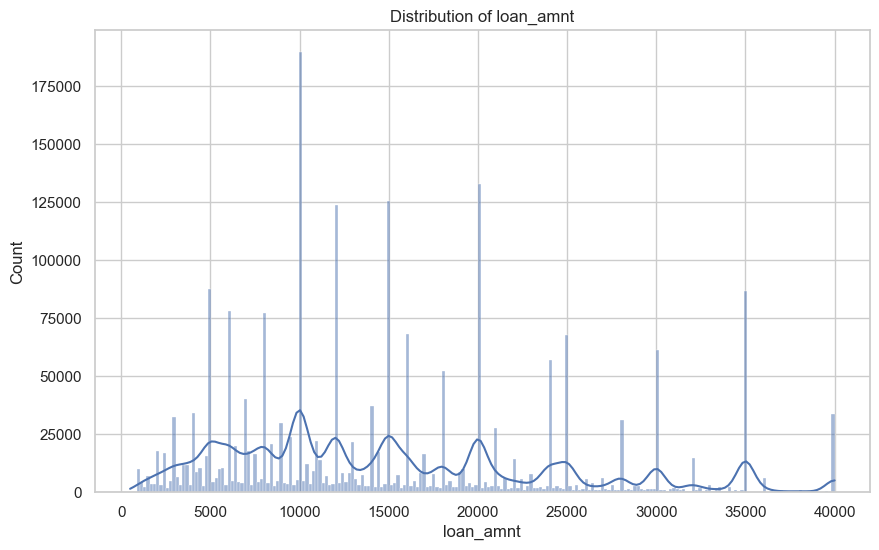

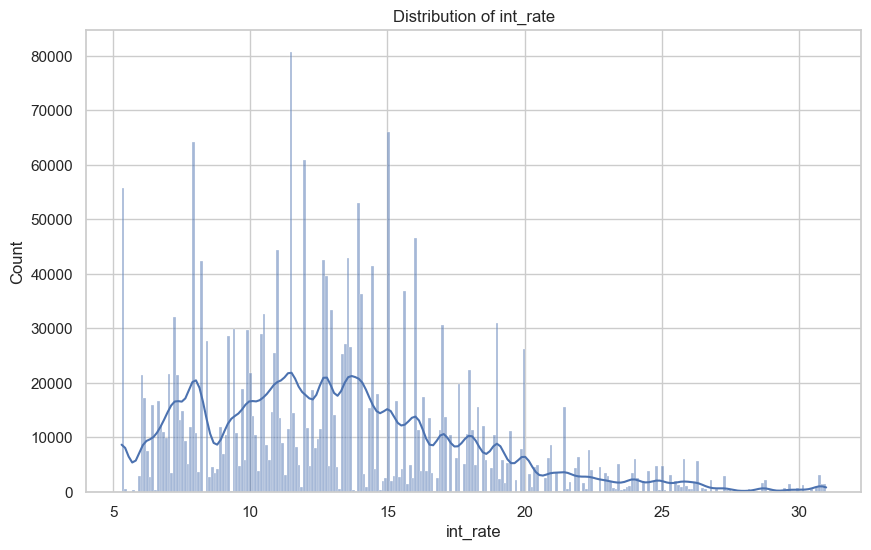

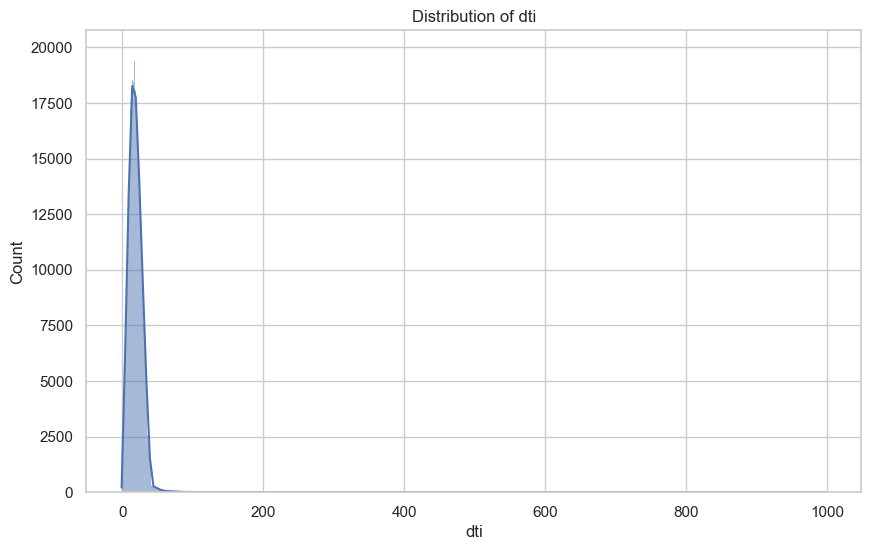

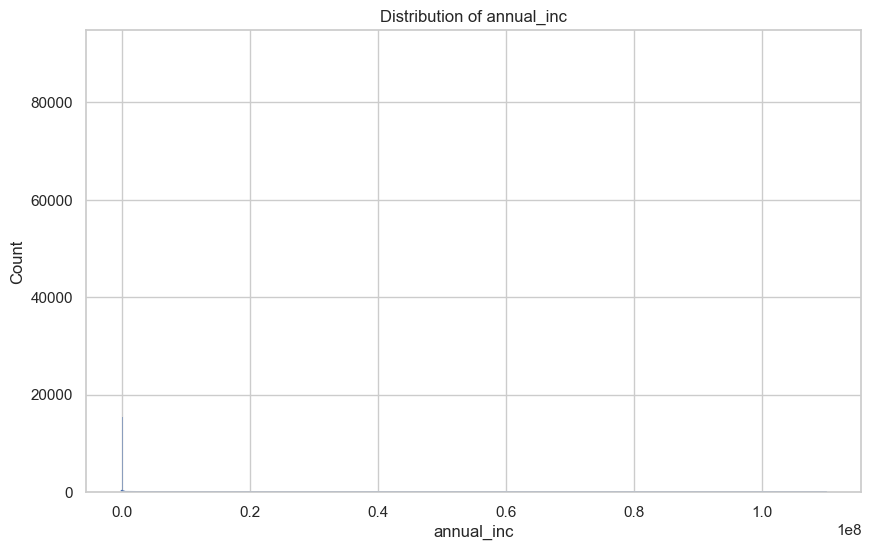

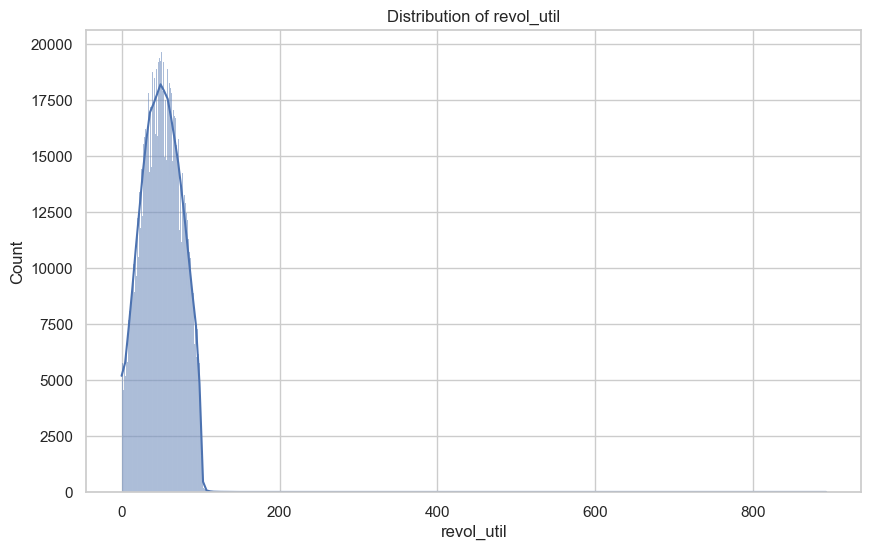

In [10]:
# Numeric distributions
numeric_cols = ["loan_amnt", "int_rate", "dti", "annual_inc", "revol_util"]
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


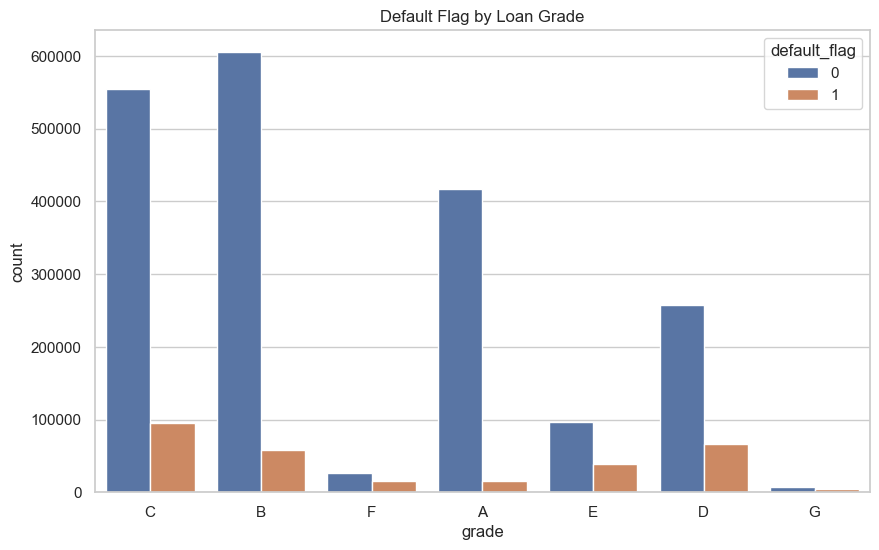

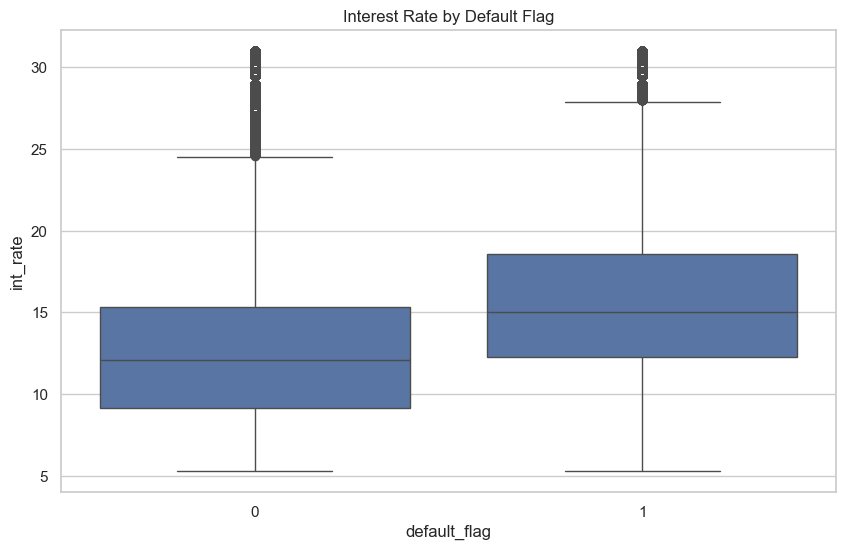

In [11]:
# Default rate by grade
sns.countplot(data=df, x="grade", hue="default_flag")
plt.title("Default Flag by Loan Grade")
plt.show()

# Interest rate vs. default
sns.boxplot(data=df, x="default_flag", y="int_rate")
plt.title("Interest Rate by Default Flag")
plt.show()


In [12]:
# ─── Column Summary ─────────────────────────────────────────────────────────────
import pandas as pd

summary = pd.DataFrame({
    "dtype":     df.dtypes,
    "n_unique":  df.nunique(),
    "missing%":  (df.isnull().mean() * 100).round(2)
})
# show all columns sorted by missing%
display(summary.sort_values("missing%", ascending=False))

# ─── Unique Counts for Object Columns ──────────────────────────────────────────
print("\nObject-dtype columns and their unique counts:")
for col in df.select_dtypes(include="object").columns:
    print(f"  {col:30s}: {df[col].nunique():5d}")

# ─── Check Object Columns for Numeric Content ──────────────────────────────────
print("\nObject-columns with >50% parseable as numeric:")
for col in df.select_dtypes(include="object").columns:
    numeric_series = pd.to_numeric(df[col], errors="coerce")
    pct_numeric = numeric_series.notna().mean() * 100
    if pct_numeric > 50:
        print(f"  {col:30s}: {pct_numeric:.1f}% numeric")


,dtype,n_unique,missing%
il_util,float64,280,47.28
mths_since_rcnt_il,float64,405,40.25
all_util,float64,188,38.32
open_acc_6m,float64,19,38.31
open_act_il,float64,54,38.31
...,...,...,...
out_prncp,float64,356141,0.00
initial_list_status,object,2,0.00
total_acc,float64,152,0.00
revol_util,float64,1430,0.00



Object-dtype columns and their unique counts:
  id                            : 2260701
  term                          :     2
  grade                         :     7
  sub_grade                     :    35
  emp_title                     : 512694
  emp_length                    :    11
  home_ownership                :     6
  verification_status           :     3
  issue_d                       :   139
  loan_status                   :     9
  pymnt_plan                    :     2
  url                           : 2260668
  purpose                       :    14
  title                         : 63154
  zip_code                      :   956
  addr_state                    :    51
  earliest_cr_line              :   754
  initial_list_status           :     2
  last_pymnt_d                  :   136
  last_credit_pull_d            :   141
  application_type              :     2
  hardship_flag                 :     2
  disbursement_method           :     2
  debt_settlement_flag      

In [13]:
# ─── 1. Identify cols to drop ───────────────────────────────────────────────────
# Recompute missing percentages on the current df
missing_pct = df.isna().mean() * 100

# a) Drop-anything >40% missing
drop_missing = missing_pct[missing_pct > 40].index.tolist()

# b) Always drop these high-cardinality/irrelevant fields
drop_high_card = ["id", "url", "emp_title", "title", "zip_code"]

to_drop = list(set(drop_missing + drop_high_card))
print(f"Dropping {len(to_drop)} columns:", to_drop)

# Drop them
df2 = df.drop(columns=to_drop)
print("New shape:", df2.shape)

# ─── 2. Convert date columns ────────────────────────────────────────────────────
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
for col in date_cols:
    df2[col] = pd.to_datetime(df2[col], format="%b-%Y", errors="coerce")

# ─── 3. Check result ────────────────────────────────────────────────────────────
print("\nPost-drop DataFrame info:")
df2.info()


Dropping 7 columns: ['mths_since_rcnt_il', 'zip_code', 'title', 'id', 'url', 'il_util', 'emp_title']
New shape: (2260701, 101)

Post-drop DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 101 entries, loan_amnt to default_flag
dtypes: datetime64[ns](4), float64(81), int64(1), object(15)
memory usage: 1.7+ GB


In [20]:
# ─── List Columns by Type ────────────────────────────────────────────────────────
num_cols = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
date_cols = df2.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print(f"Numerical columns ({len(num_cols)}):\n", num_cols, "\n")
print(f"Categorical columns ({len(cat_cols)}):\n", cat_cols, "\n")
print(f"Datetime columns ({len(date_cols)}):\n", date_cols)


Numerical columns (82):
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent

In [21]:
# Patterns to drop
leak_patterns = [
    'out_prncp', 'total_pymnt', 'total_rec_', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_', 'last_fico_range', 'last_credit_pull',
    'mths_since_recent', 'open_il_', 'open_act_il', 'open_rv_',
    'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_bc_limit',
    'num_tl_120dpd', 'num_tl_30dpd', 'num_tl_90g_dpd', 'num_tl_op_past_12m'
]
to_drop = [col for col in df2.columns if any(p in col for p in leak_patterns)]
print(f"Dropping {len(to_drop)} leak/post-origination columns.")

df3 = df2.drop(columns=to_drop)
print("New shape:", df3.shape)

# Quick check of remaining types
print("\nRemaining numeric cols:", len(df3.select_dtypes(['float64','int64'])))
print("Remaining object cols:", df3.select_dtypes('object').columns.tolist())


Dropping 29 leak/post-origination columns.
New shape: (2260701, 72)

Remaining numeric cols: 2260701
Remaining object cols: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [26]:
# ─── 1. Recompute column counts properly ─────────────────────────────────────────
num_cols = df3.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df3.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns ({len(num_cols)}): {num_cols}\n")
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}\n")


Numeric columns (55): ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'open_acc_6m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit', 'default_flag']

Categorical columns (15): ['term', 'gr

In [27]:
# ─── 2. Drop loan_status (we have default_flag) ─────────────────────────────────
df4 = df3.drop(columns=['loan_status'])


In [30]:
# ─── 3. Engineer date features ──────────────────────────────────────────────────
# Loan issue year/month
df4['loan_issue_year'] = df4['issue_d'].dt.year
df4['loan_issue_month'] = df4['issue_d'].dt.month

# Credit history length in years
df4['credit_history_years'] = (
    df4['issue_d'] - df4['earliest_cr_line']
).dt.days / 365.25

# Drop raw date columns
df4.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)


In [31]:
# ─── 4. Convert key categoricals ─────────────────────────────────────────────────
# Term: "36 months" → 36
df4['term'] = df4['term'].str.extract(r'(\d+)').astype(int)

# Emp_length: map "< 1 year"→0.5, "1 year"→1, …, "10+ years"→10
emp_map = {
    '< 1 year': 0.5,
    '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8,
    '9 years': 9, '10+ years': 10
}
df4['emp_length'] = df4['emp_length'].map(emp_map)


In [32]:
# ─── 5. Final feature summary ───────────────────────────────────────────────────
final_num = df4.select_dtypes(include=['float64','int64']).columns.tolist()
final_cat = df4.select_dtypes(include=['object']).columns.tolist()

print(f"After engineering, numeric cols ({len(final_num)}):\n", final_num, "\n")
print(f"After engineering, categorical cols ({len(final_cat)}):\n", final_cat)


After engineering, numeric cols (58):
 ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'open_acc_6m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit', 'default_flag', 

In [36]:
# ensure the folder exists (only needed once)
import os
os.makedirs("../data/processed", exist_ok=True)

# save df4 to CSV without the index column
df4.to_csv("../data/processed/cleaned_loans.csv", index=False)

print("Saved cleaned_loans.csv with shape:", df4.shape)


Saved cleaned_loans.csv with shape: (2260701, 72)
